# Propensity Scores

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge

In [2]:
data = pkl.load(open('./data/data.pkl', 'rb'))
data.head(2)

,confidence,index,time,token_path,term_match,word_net,T,Y
0,33.6,11,4.0,0.614881,1.000000,1.0,False,18
1,33.6,12,3.0,0.430476,0.427287,1.0,False,12


In [3]:
def calc_props(df):
    x = df[df.columns[~df.columns.isin(['T','Y'])]]
    t = df['T'].values
    log_reg = LogisticRegression(max_iter=10000).fit(x, t)
    probs = log_reg.predict_proba(x)[:,1]
    df['propensity'] = probs
    df['weighted'] = probs / (1-probs)
    return df

In [4]:
data = calc_props(data)

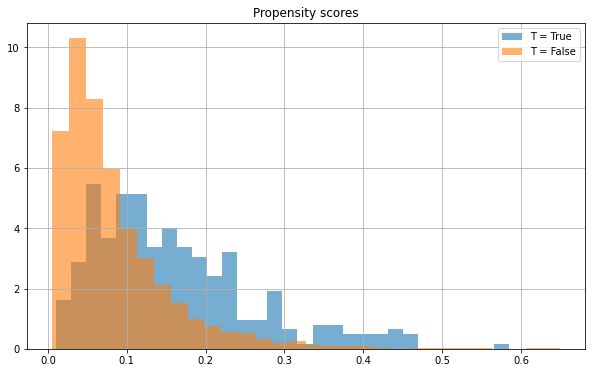

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
data[data['T']].propensity.hist(bins=30, ax=ax, alpha=0.6, density=True, label='T = True')
data[~data['T']].propensity.hist(bins=30, ax=ax, alpha=0.6, density=True, label='T = False')
plt.title("Propensity scores")
plt.legend()
plt.show()

In [6]:
save = True
if save:
    pkl.dump(data, open("./data/data_p.pkl", "wb"))